In [1]:
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#import the csv from fedhere Lab9 github:
url = 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/Lab9_fb55/Asc.csv'

regression_data = pd.read_csv(url,header=None, names=['x', 'y1','tmp2', 'y2', 'tmp3', 'tmp4', 'tmp5', 'tmp6'], sep="\t")

In [6]:
#print out the data
regression_data.head(11)

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [7]:
#sort values by x variable
regression_data.sort_values(by='x',inplace=True)

In [8]:
#visualize sorted data
regression_data

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
10,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71


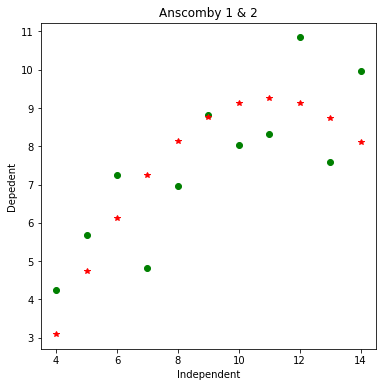

In [27]:
#make a scatter plot

fig = plt.figure(figsize=(6,6)) #initialize figure
ax = fig.add_subplot(111) #initialize subplot

#plot data sets

ax.plot(regression_data['x'], regression_data['y1'],'go') 
ax.plot(regression_data['x'], regression_data['y2'], 'r*')

#format and label
plt.xlabel('Independent')
plt.ylabel('Depedent')

plt.title('Anscomby 1 & 2');


### First Anscomby distribution: y1

#### OLS linear fit y1~x

In [36]:
equation = 'y1~x'

ols1 = smf.ols(formula=equation, data=regression_data).fit()
ols1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00217
Time:                        15:11:58   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026         0.456     5.544
x              0.5001      0.118      4.241      0.002         0.233     0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.788
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

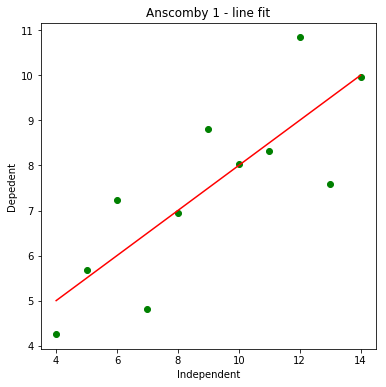

In [37]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(regression_data['x'],regression_data['y1'],'go')
ax.plot(regression_data['x'],ols1.predict(regression_data),color='red')

ax.set_xlabel('Independent')
ax.set_ylabel('Depedent')
plt.title('Anscomby 1 - line fit');

### OLS quadratic fit y1~x^2 + x

In [32]:
# create a new feature for x^2
regression_data['x2'] = regression_data['x']**2

In [38]:
#create a quadratic model from the new feature X2
equation = 'y1~x2+x'

ols_quad = smf.ols(formula=equation,data=regression_data).fit()
ols_quad.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00956
Time:                        15:12:02   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.824        -6.827     8.338
x2            -0.0316      0.043     -0.729      0.487        -0.132     0.068
x              1.0693      0.790      1.354      0.213        -0.752     2.891
==============================================================================
Omnibus:                        0.167   Durbin-Watson:                   2.957
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.302
Skew:                          -0.220   Prob(JB):                        0.860
Kurtosis:                       2.318   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

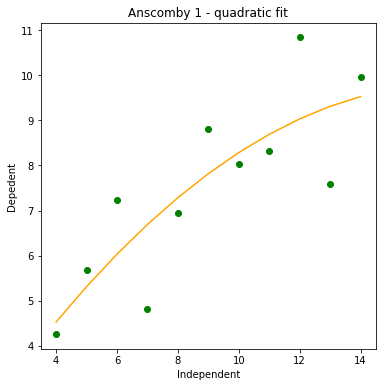

In [41]:
#visualize quadratic regression

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

#plot data 
ax.plot(regression_data['x'],regression_data['y1'],'go')
ax.plot(regression_data['x'], ols_quad.predict(regression_data),color='orange')


ax.set_xlabel('Independent')
ax.set_ylabel('Depedent')
ax.set_title('Anscomby 1 - quadratic fit');

## Compare the models with the LR ratio test

In [42]:
ols_quad.compare_lr_test(ols1)

(0.70794919019374447, 0.40012547285804223, 1.0)

### Explanation of Result:

#### An LR test compares the log likelihood between two models, the complex (y=x2+x) and restricted (y=x), which is similar to evaluate the two models for goodness of fit to the underlying data. The LR test returns three values: The Likelihood ratio statistic, the p-value, and the difference in degrees of freedom of the two models. In this case:

#### likelihood ratio statistic = 0.707 based on the equation LR = -2 (log(Likelihood)_restricted - log(Likelihood)_complex), so a value of 0.7 suggests the log likelihood for the models is similar (which it is, -16.8 for the restricted and -16.4 for the complex model)
#### p-value = 0.4001 so in this case we could not reject the null hypothesis at a standard significance level, which means that the complex model is not better than the simpler model at predicting y
#### degrees of freedom difference = 1 because we are comparing a model with x2 and x to the restricted model which just has x 

### Do it yourself as homework:¶
#### 1 write down in words what this result means
#### 2 do the same for the other series of data (y2)
#### 3 use the value of the likelihood which you can find in the models summary and the formula for the likelihood ration in the slides to derive the same result: you should be able to obtain the value of the statistics and by comparing it with a chisq table the relative p-value

In [50]:
#set up first regression 

equation = 'y2~x'

ols2 = smf.ols(formula=equation, data=regression_data).fit()
ols2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Thu, 22 Nov 2018   Prob (F-statistic):            0.00218
Time:                        16:08:53   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026         0.455     5.547
x              0.5000      0.118      4.239      0.002         0.233     0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

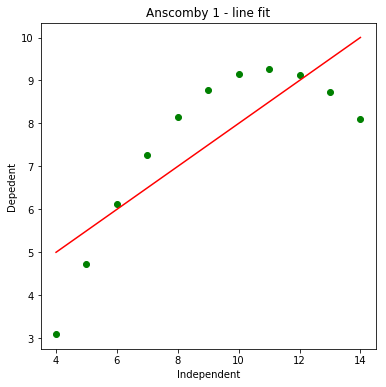

In [51]:
#visualize the regression

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(regression_data['x'],regression_data['y2'],'go')
ax.plot(regression_data['x'],ols2.predict(regression_data),color='red')

ax.set_xlabel('Independent')
ax.set_ylabel('Depedent')
plt.title('Anscomby 1 - line fit');

In [53]:
#set up regression with quadratic X

#set up first regression 

equation = 'y2~x2 + x'

ols_quad2 = smf.ols(formula=equation, data=regression_data).fit()
ols_quad2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           8.64e-26
Time:                        16:09:22   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.000        -6.006    -5.986
x2            -0.1267   5.71e-05  -2219.238      0.000        -0.127    -0.127
x              2.7808      0.001   2673.741      0.000         2.778     2.783
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   2.928
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.697
Skew:                           0.809   Prob(JB):                        0.428
Kurtosis:                       1.959   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

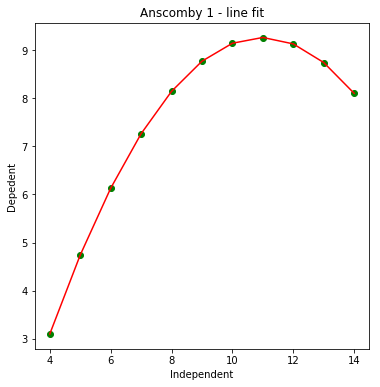

In [54]:
#visualize the regression

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(regression_data['x'],regression_data['y2'],'go')
ax.plot(regression_data['x'],ols_quad2.predict(regression_data),color='red')

ax.set_xlabel('Independent')
ax.set_ylabel('Depedent')
plt.title('Anscomby 1 - line fit');

In [55]:
#run LR test to compare quadratic X to linear X

ols_quad2.compare_lr_test(ols2)

(146.63437980392047, 9.4331834208378821e-34, 1.0)

In [58]:
# calculating LR manually from formula:

#LR = -2 (log(Likelihood)_restricted - log(Likelihood)_complex)

LR = -2 * (-16.846 - 56.471)
print("the manually calculated LR is {}, which matches the statsmodel test".format(LR))

the manually calculated LR is 146.634, which matches the statsmodel test


### Explanation 

#### The LR statistic is large number which means that the more complex model does a better job at predicting y than does the restricted model. The LR statistic is so high in this case we can reject the null hypothesis at a 99% confidence level). 